<a href="https://colab.research.google.com/github/tbradshaw91/funrobots/blob/master/Disney_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
url = ('https://query.data.world/s/szkcxs6pajm4hiij4hmmzbzdb2bkxd')
disneydf = pd.read_csv(url)

In [3]:
disneydf.head()

,Year,Studio Entertainment[NI 1],Disney Consumer Products[NI 2],Disney Interactive[NI 3][Rev 1],Walt Disney Parks and Resorts,Disney Media Networks,Total
0,1991,2593.0,724.0,NaN,2794.0,NaN,6111
1,1992,3115.0,1081.0,NaN,3306.0,NaN,7502
2,1993,3673.4,1415.1,NaN,3440.7,NaN,8529
3,1994,4793.0,1798.2,NaN,3463.6,359,10414
4,1995,6001.5,2150.0,NaN,3959.8,414,12525


In [4]:
# Checking out the columns
disneydf.columns

Index(['Year', 'Studio Entertainment[NI 1]', 'Disney Consumer Products[NI 2]',
       'Disney Interactive[NI 3][Rev 1]', 'Walt Disney Parks and Resorts',
       'Disney Media Networks', 'Total'],
      dtype='object')

In [5]:
# Checking out nulls
disneydf.isnull().sum()

Year                                0
Studio Entertainment[NI 1]          1
Disney Consumer Products[NI 2]      2
Disney Interactive[NI 3][Rev 1]    14
Walt Disney Parks and Resorts       0
Disney Media Networks               3
Total                               0
dtype: int64

In [0]:
# I don't need those columns as of right now
disneydf = disneydf.drop(columns=['Disney Interactive[NI 3][Rev 1]', 'Disney Media Networks'])

In [7]:
# Ok, cool they are gone..however, I still need to fix the nan situation
disneydf.isna().sum()

Year                              0
Studio Entertainment[NI 1]        1
Disney Consumer Products[NI 2]    2
Walt Disney Parks and Resorts     0
Total                             0
dtype: int64

In [0]:
disneydf = disneydf.fillna(0)

In [9]:
disneydf.head()

,Year,Studio Entertainment[NI 1],Disney Consumer Products[NI 2],Walt Disney Parks and Resorts,Total
0,1991,2593.0,724.0,2794.0,6111
1,1992,3115.0,1081.0,3306.0,7502
2,1993,3673.4,1415.1,3440.7,8529
3,1994,4793.0,1798.2,3463.6,10414
4,1995,6001.5,2150.0,3959.8,12525


In [10]:
disneydf.describe()

,Year,Studio Entertainment[NI 1],Disney Consumer Products[NI 2],Walt Disney Parks and Resorts,Total
count,26.000000,26.00000,26.000000,26.000000,26.000000
mean,2003.500000,6197.15000,2391.742308,8512.619231,29459.692308
std,7.648529,1991.17362,1097.064562,4253.949784,13846.671536
min,1991.000000,0.00000,0.000000,2794.000000,6111.000000
25%,1997.250000,5982.75000,2132.750000,5143.500000,22598.750000
50%,2003.500000,6624.50000,2432.500000,7276.500000,28906.500000
75%,2009.750000,7360.00000,3044.250000,11318.250000,38008.000000
max,2016.000000,9441.00000,4499.000000,16974.000000,55632.000000


## **Represented in Millions/Billions**

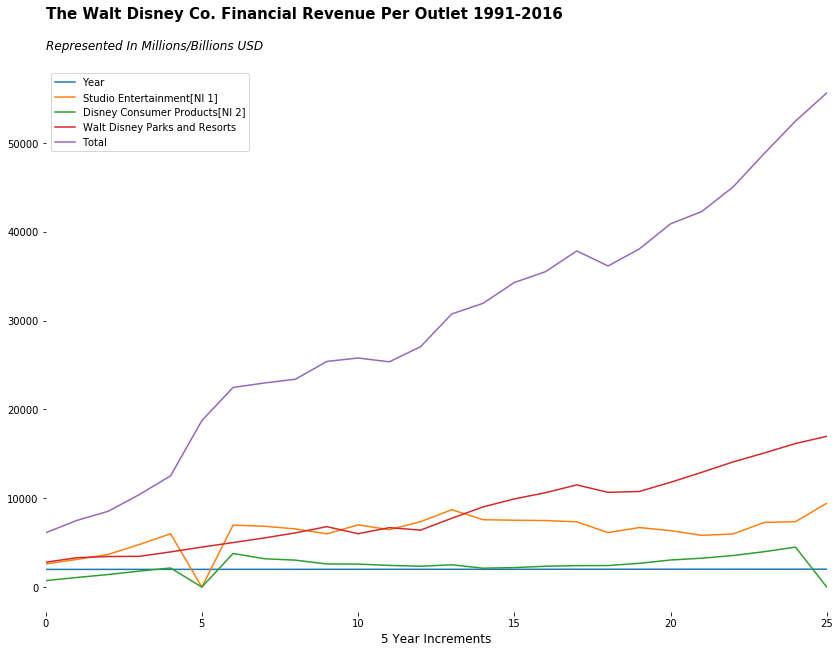

In [30]:
# Plotting
plt.style.context('fivethirtyeight')
ax = disneydf.plot(figsize=(14,10))

# Title and Subtitle
ax.text(s="The Walt Disney Co. Financial Revenue Per Outlet 1991-2016 ", y=64000, x=0, fontsize=15, fontweight='semibold')
ax.text(s="Represented In Millions/Billions USD", y=60500, x=0, fontsize=12, fontstyle='italic');

# The little details
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

#ax.set_ylabel('Millions', fontsize=(12))
ax.set_xlabel('5 Year Increments', fontsize=(12));

***Based on the analysis above, we can conclude that WDC growth has been pretty consistent over the past 26 years. The most stable source of income for WDC would be the Parks and Resorts which have seen a steady increase, followed by Studio Entertainment. I would be curious to see new numbers for 2017 and 2018 since they acquired Fox and Marvel. The consumer products income stream they has been the lowest over with a decrease in growth towards year 2016. ***

## **Now I would like to look at what year has been the most profitable over the past 26 years**

In [13]:
# The most profitable year was 2016
disneydf.nlargest(1, 'Total')

,Year,Studio Entertainment[NI 1],Disney Consumer Products[NI 2],Walt Disney Parks and Resorts,Total
25,2016,9441.0,0.0,16974.0,55632


In [14]:
# The least profitable year was 1991
disneydf.nsmallest(1, 'Total')

,Year,Studio Entertainment[NI 1],Disney Consumer Products[NI 2],Walt Disney Parks and Resorts,Total
0,1991,2593.0,724.0,2794.0,6111


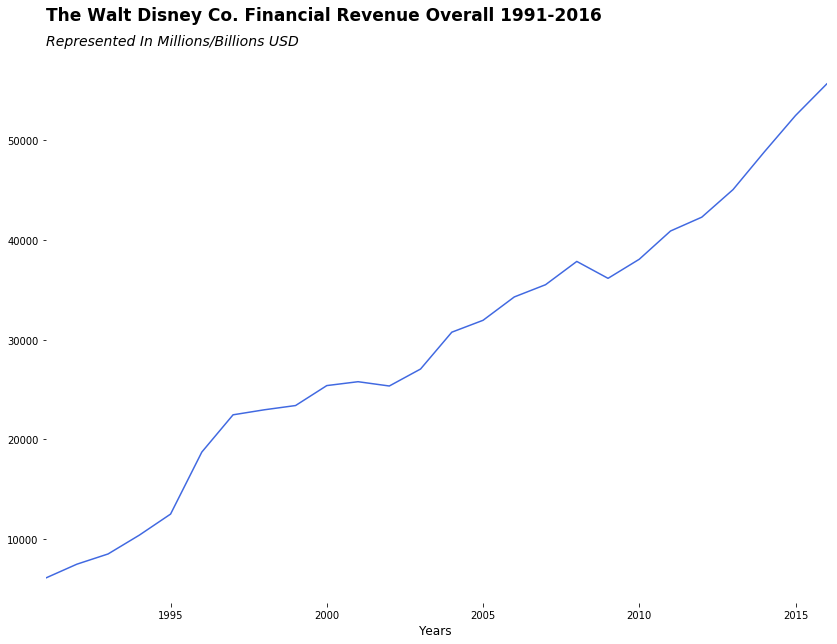

In [26]:
# Plotting
plt.style.context('fivethirtyeight')
ax = disneydf.plot(x='Year', y='Total', figsize=(14,10), color='royalblue')

# Title and Subtitle
ax.text(s="The Walt Disney Co. Financial Revenue Overall 1991-2016 ", y=62000, x=1991, fontsize=17, fontweight='semibold')
ax.text(s="Represented In Millions/Billions USD", y=59500, x=1991, fontsize=14, fontstyle='italic');

# The little details
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_legend().remove()
#ax.set_ylabel('Millions', fontsize=(12))
ax.set_xlabel('Years', fontsize=(12));

In [16]:
disneydf.columns

Index(['Year', 'Studio Entertainment[NI 1]', 'Disney Consumer Products[NI 2]',
       'Walt Disney Parks and Resorts', 'Total'],
      dtype='object')

## **Next up, let's look at how Studio Entertainment has grown over the years**

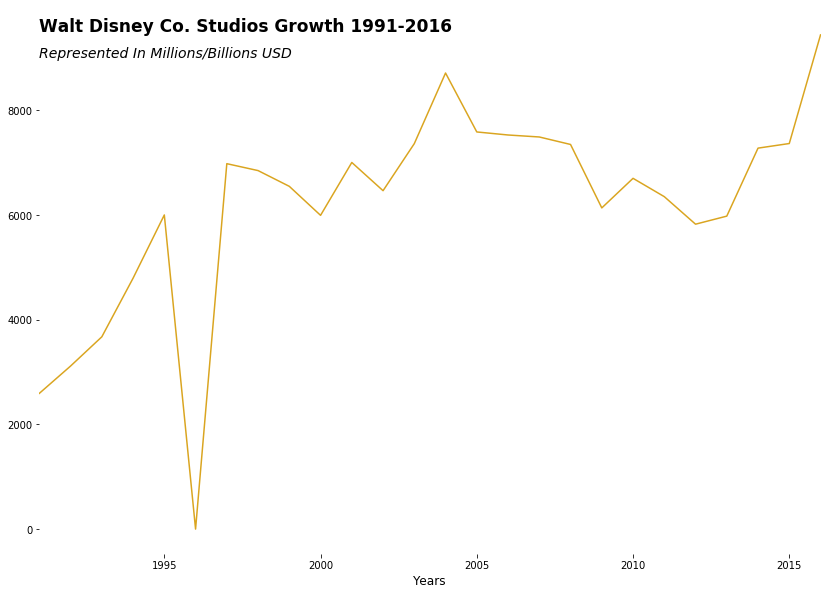

In [36]:
# Plotting
plt.style.context('fivethirtyeight')
ax = disneydf.plot(x='Year', y='Studio Entertainment[NI 1]', figsize=(14,10), color='goldenrod')

# Title and Subtitle
ax.text(s="Walt Disney Co. Studios Growth 1991-2016 ", y=9500, x=1991, fontsize=17, fontweight='semibold')
ax.text(s="Represented In Millions/Billions USD", y=9000, x=1991, fontsize=14, fontstyle='italic');

# The little details
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_legend().remove()
#ax.set_ylabel('Millions', fontsize=(12))
ax.set_xlabel('Years', fontsize=(12));

**When looking specifically at the Disney Studios, We can see that in 1996/1997 they experienced a deep plunge. It would be an interesting exercise to look at what events occurred around that time to cause such a plunge. **

## **Looking at The Parks and Resorts **

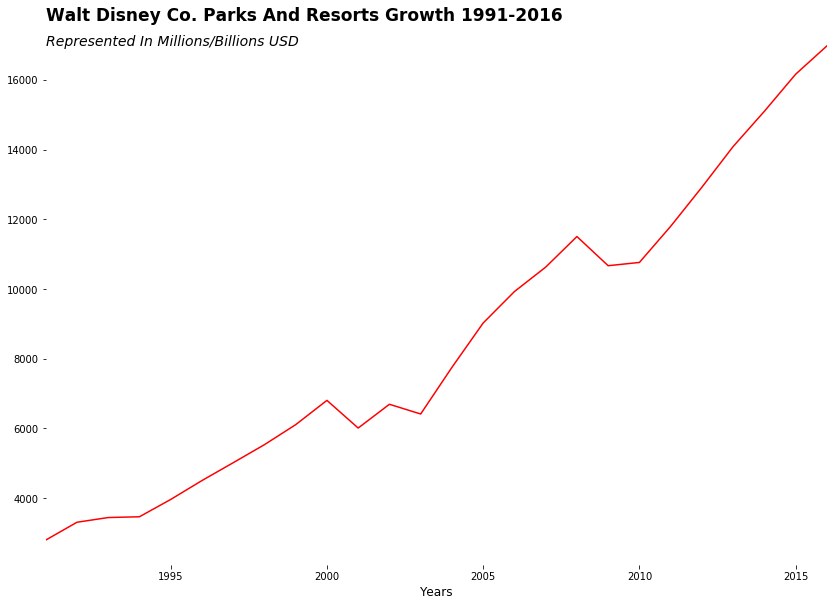

In [34]:
# Plotting
plt.style.context('fivethirtyeight')
ax = disneydf.plot(x='Year', y='Walt Disney Parks and Resorts', figsize=(14,10), color='red')

# Title and Subtitle
ax.text(s="Walt Disney Co. Parks And Resorts Growth 1991-2016 ", y=17700, x=1991, fontsize=17, fontweight='semibold')
ax.text(s="Represented In Millions/Billions USD", y=17000, x=1991, fontsize=14, fontstyle='italic');

# The little details
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_legend().remove()
#ax.set_ylabel('Millions', fontsize=(12))
ax.set_xlabel('Years', fontsize=(12));

**Not surprising, WDC Parks and Resorts have continuously gained traction over the years. This will probably boom even more when Star Wars land opens. **

## **And last but not least, let's look at why Disney Consumer Products are so low...**

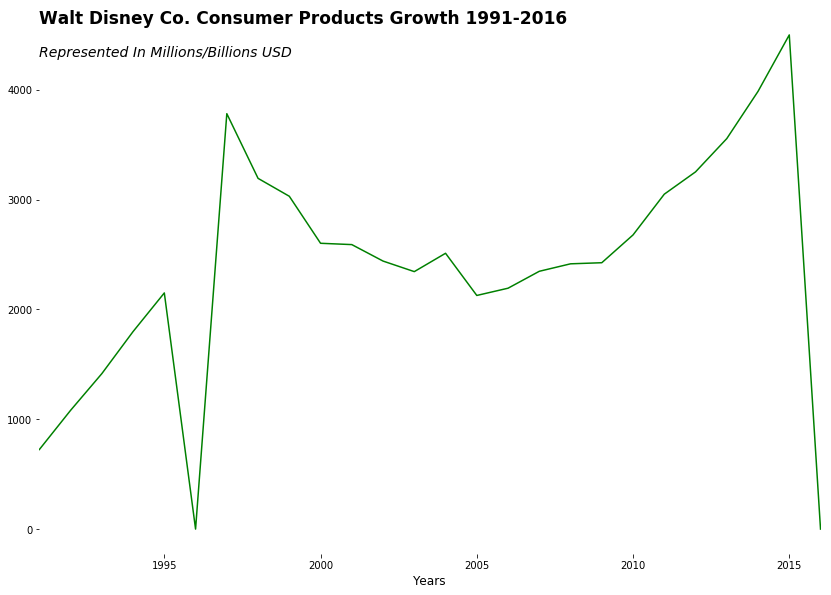

In [35]:
# Plotting
plt.style.context('fivethirtyeight')
ax = disneydf.plot(x='Year', y='Disney Consumer Products[NI 2]', figsize=(14,10), color='green')

# Title and Subtitle
ax.text(s="Walt Disney Co. Consumer Products Growth 1991-2016 ", y=4600, x=1991, fontsize=17, fontweight='semibold')
ax.text(s="Represented In Millions/Billions USD", y=4300, x=1991, fontsize=14, fontstyle='italic');

# The little details
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_legend().remove()
#ax.set_ylabel('Millions', fontsize=(12))
ax.set_xlabel('Years', fontsize=(12));